In [36]:
import pandas as pd
import numpy as np
import category_encoders as ce
import tensorflow as tf
import matplotlib.pyplot as plt
from joblib import dump
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
# Read in the csv
df = pd.read_csv("../data/raw/beer_reviews.csv")
# Select necessary columns
df = df[['review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv', 'brewery_name', 'beer_style']]
df.head()

,review_appearance,review_aroma,review_palate,review_taste,beer_abv,brewery_name,beer_style
0,2.5,2.0,1.5,1.5,5.0,Vecchio Birraio,Hefeweizen
1,3.0,2.5,3.0,3.0,6.2,Vecchio Birraio,English Strong Ale
2,3.0,2.5,3.0,3.0,6.5,Vecchio Birraio,Foreign / Export Stout
3,3.5,3.0,2.5,3.0,5.0,Vecchio Birraio,German Pilsener
4,4.0,4.5,4.0,4.5,7.7,Caldera Brewing Company,American Double / Imperial IPA


In [38]:
# Handle missing values
df['beer_abv'].fillna(df['beer_abv'].median(), inplace=True)
df['brewery_name'].fillna('unknown', inplace=True)

In [39]:
# Encode the beer_style column
le = LabelEncoder()
df['beer_style'] = le.fit_transform(df['beer_style'])

In [40]:
# Select columns to be encoded
cols_to_encode = ['brewery_name']

# Instantiate encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

In [41]:
# Fit and transform the columns
df_encoded = encoder.fit_transform(df[cols_to_encode], df['beer_style'])

# Replace original columns with encoded ones in the dataframe
df.drop(cols_to_encode, axis=1, inplace=True)
df = pd.concat([df, df_encoded], axis=1)

In [42]:
# Assuming that df_X contains your features and df_y contains your target
df_X = df.drop('beer_style', axis=1)
df_y = df['beer_style']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [43]:
# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

# Add an output layer 
model.add(Dense(len(y_train.unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/20
1655/3967 [===========>..................] - ETA: 2s - loss: 3.5397 - accuracy: 0.1522

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Model Accuracy: %.2f%%" % (accuracy*100))

9917/9917 [==============================] - 4s 430us/step - loss: 2.8444 - accuracy: 0.2706
Model Accuracy: 27.06%


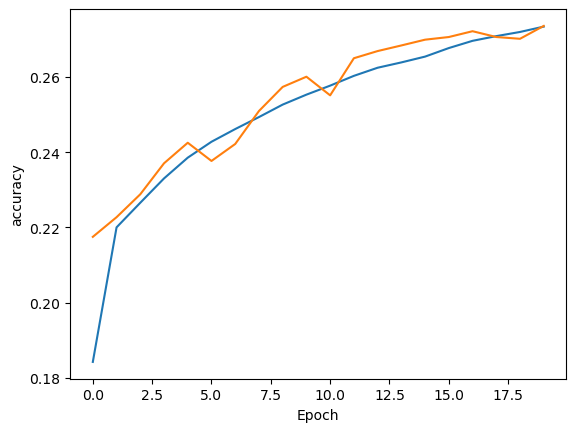

In [ ]:

plt.plot(history.history['accuracy'], label='MSE training')
plt.plot(history.history['val_accuracy'], label='MSE validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Save the model
dump(model, '../models/stefan_dev.joblib')

# Save the encoders
dump(le, '../models/label_encoder.joblib')
dump(encoder, '../models/target_encoder.joblib')

INFO:tensorflow:Assets written to: ram://7f2be75a-9b0a-4428-a0f6-50f3828e9713/assets


['../models/stefan_dev.joblib']